In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix

# Load data

In [2]:
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

(1797, 64)


<Figure size 432x288 with 0 Axes>

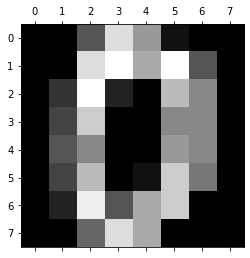

In [3]:
print(digits.data.shape)
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

In [4]:
X = digits.data
y = digits.target

## Plots

In [5]:
def SVM_plot(type, X, Y):
    
    pca = PCA(n_components = 2)
    warnings.simplefilter(action='ignore', category=FutureWarning)
    
    if type == kernel:
        for k in kernel:
            classifier = SVC(kernel=k)
            X_train2 = pca.fit_transform(X)
            classifier.fit(X_train2, Y)
            plot_decision_regions(X_train2, Y, clf=classifier, legend=2)
#             plt.xlabel(X_train2, size=14)
#             plt.ylabel(Y, size=14)
            plt.title(f'kernel = {k}')
            plt.show();
            
    elif type == degree:
        for d in degree:
            classifier = SVC(kernel='poly', degree=d)
            X_train2 = pca.fit_transform(X)
            classifier.fit(X_train2, Y)
            plot_decision_regions(X_train2, Y, clf=classifier, legend=2)
#             plt.xlabel(X_train2, size=14)
#             plt.ylabel(Y, size=14)
            plt.title(f'degree = {d}')
            plt.show();

    elif type == gamma:
        for g in gamma:
            pca = PCA(n_components = 2)
            classifier = SVC(kernel='rbf', gamma = g)
            X_train2 = pca.fit_transform(X)
            classifier.fit(X_train2, Y)
            plot_decision_regions(X_train2, Y, clf=classifier, legend=2)
#             plt.xlabel(X_train2, size=14)
#             plt.ylabel(Y, size=14)
            plt.title(f'gamma = {g}')
            plt.show();
  
    else:
        return 'Wrong data selected, please check again'

### Kernel plots

In [6]:
kernel = ['poly', 'linear', 'rbf']
lin_svm = {}

for k in kernel:
    lin_svm[k] = SVC(kernel=k)
    lin_svm[k].fit(X,y)

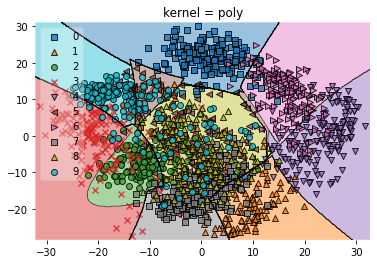

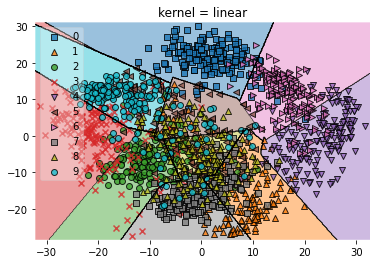

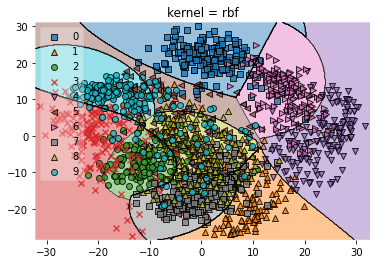

In [7]:
SVM_plot(kernel, X, y)

### Degree plots

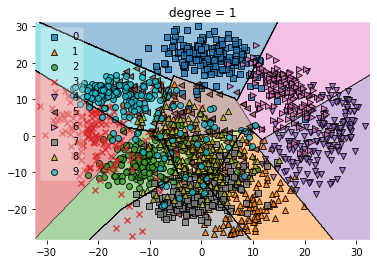

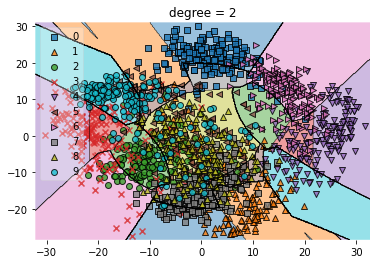

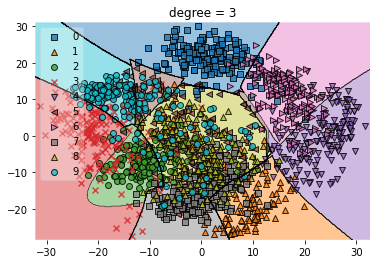

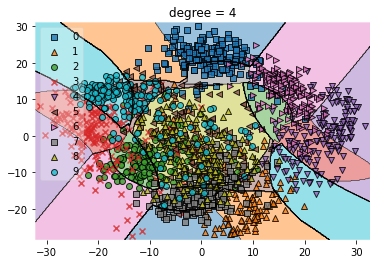

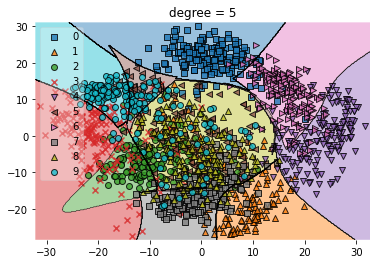

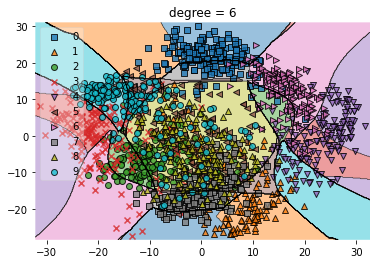

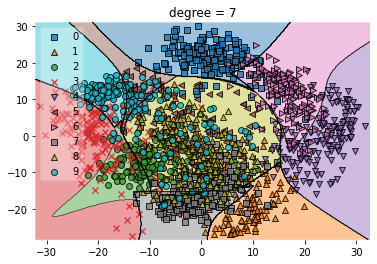

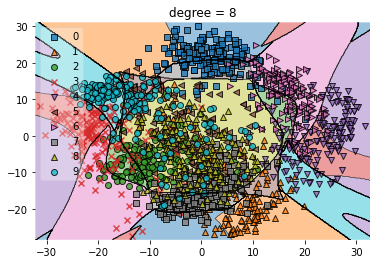

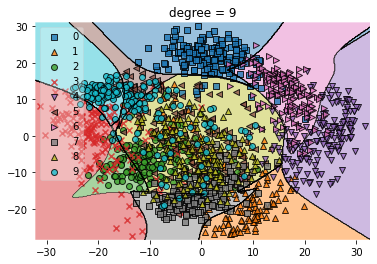

In [8]:
degree = [x for x in range(1,10)]

SVM_plot(degree, X, y)

### Gamma plots

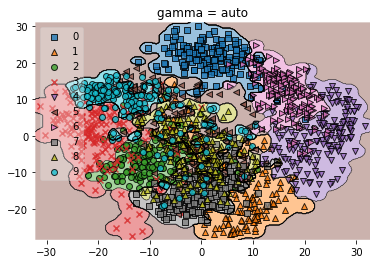

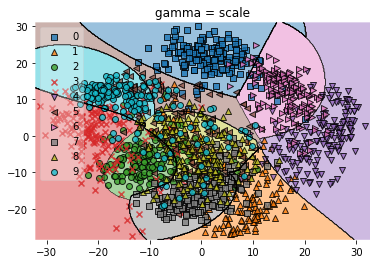

In [9]:
gamma = ['auto', 'scale']

SVM_plot(gamma, X, y)

# SVC Model

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

classifier = svm.SVC()
classifier.fit(X_train, y_train)
# classifier.score(X_test, y_test)

SVC()

In [11]:
test_hypotheses = classifier.predict(X_test)

print(classification_report(test_hypotheses, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      0.95      0.98        44
           2       1.00      0.98      0.99        48
           3       0.98      1.00      0.99        42
           4       0.98      1.00      0.99        47
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        46
           7       0.98      0.98      0.98        44
           8       0.96      0.98      0.97        48
           9       0.98      0.96      0.97        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Accuracy: 0.9844444444444445


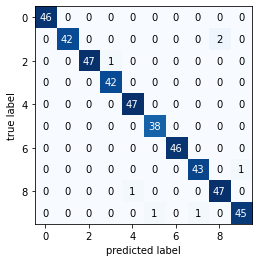

In [12]:
cm = confusion_matrix(test_hypotheses, y_test)
plot_confusion_matrix(cm)

print(f'Accuracy: {accuracy_score(test_hypotheses, y_test)}')

# Grid Search

In [13]:
clf = svm.SVC()

params = {
    "C": [1.0, 5.0, 0.2],
    "kernel": ['linear','rbf', 'poly'],
    "gamma": [0.25, 0.1]
}

grid_search = GridSearchCV(clf, params, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 5.0, 0.2], 'gamma': [0.25, 0.1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [14]:
grid_search.best_params_

{'C': 1.0, 'gamma': 0.25, 'kernel': 'poly'}

In [15]:
best = grid_search.best_estimator_
best.fit(X_train, y_train)
# grid_search.best_score_

SVC(gamma=0.25, kernel='poly')

In [16]:
test_hypotheses = best.predict(X_test)

print(classification_report(test_hypotheses, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       0.98      0.93      0.95        44
           2       1.00      0.98      0.99        48
           3       0.98      0.98      0.98        43
           4       1.00      1.00      1.00        48
           5       0.95      1.00      0.97        37
           6       0.98      1.00      0.99        45
           7       0.98      0.98      0.98        44
           8       0.96      0.98      0.97        48
           9       0.96      0.94      0.95        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Accuracy: 0.9777777777777777


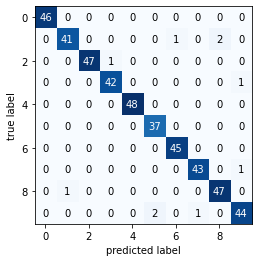

In [17]:
cm = confusion_matrix(test_hypotheses, y_test)
plot_confusion_matrix(cm)

print(f'Accuracy: {accuracy_score(test_hypotheses, y_test)}')